In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [2]:
start = '1989-01-01'
end = '2023-12-31'

stock = 'MSFT'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1989-01-03,0.371528,0.373264,0.366319,0.372396,0.230031,51825600
1,1989-01-04,0.371528,0.381076,0.371528,0.376736,0.232712,53899200
2,1989-01-05,0.380208,0.380208,0.369792,0.370660,0.228959,47246400
3,1989-01-06,0.371528,0.373264,0.368056,0.368056,0.227350,59054400
4,1989-01-09,0.368056,0.369792,0.361979,0.364583,0.225205,46008000
...,...,...,...,...,...,...,...
8812,2023-12-22,373.679993,375.179993,372.709991,374.579987,373.215393,17091100
8813,2023-12-26,375.000000,376.940002,373.500000,374.660004,373.295135,12673100
8814,2023-12-27,373.690002,375.059998,372.809998,374.070007,372.707275,14905400
8815,2023-12-28,375.369995,376.459991,374.160004,375.279999,373.912842,14327000


In [5]:
mva_days=data.Close.rolling(200).mean()
win_size=2
arr1=np.array(mva_days)
arr2=np.array(data.Close)
print(arr1)
print(arr2)

[         nan          nan          nan ... 328.92170074 329.4941507
 330.04715073]
[3.72395992e-01 3.76735985e-01 3.70660007e-01 ... 3.74070007e+02
 3.75279999e+02 3.76040009e+02]


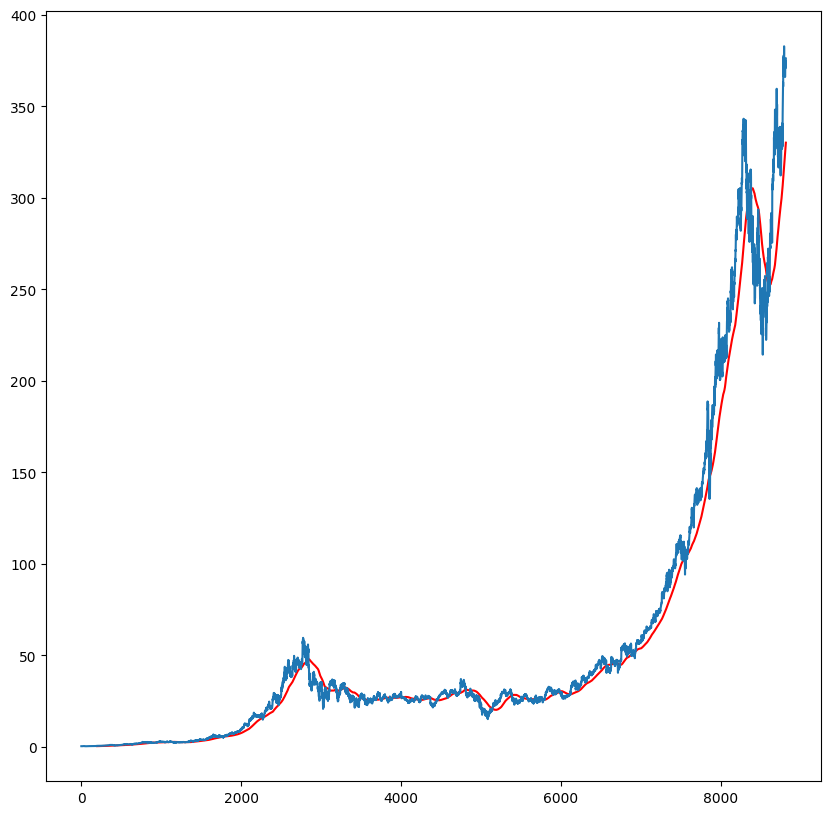

In [6]:
plt.figure(figsize=(10,10))
plt.plot(mva_days,'r')
plt.plot(data.Close)
plt.show()

In [7]:
def directional_change(close: np.array, high: np.array, low: np.array, sigma: float):
    
    up_zig = True # Last extreme is a bottom. Next is a top. 
    tmp_max = high[0]
    tmp_min = low[0]
    tmp_max_i = 0
    tmp_min_i = 0

    tops = []
    bottoms = []

    for i in range(len(close)):
        if up_zig: # Last extreme is a bottom
            if high[i] > tmp_max:
                # New high, update 
                tmp_max = high[i]
                tmp_max_i = i
            elif close[i] < tmp_max - tmp_max * sigma: 
                # Price retraced by sigma %. Top confirmed, record it
                # top[0] = confirmation index
                # top[1] = index of top
                # top[2] = price of top
                top = [i, tmp_max_i, tmp_max]
                tops.append(top)

                # Setup for next bottom
                up_zig = False
                tmp_min = low[i]
                tmp_min_i = i
        else: # Last extreme is a top
            if low[i] < tmp_min:
                # New low, update 
                tmp_min = low[i]
                tmp_min_i = i
            elif close[i] > tmp_min + tmp_min * sigma: 
                # Price retraced by sigma %. Bottom confirmed, record it
                # bottom[0] = confirmation index
                # bottom[1] = index of bottom
                # bottom[2] = price of bottom
                bottom = [i, tmp_min_i, tmp_min]
                bottoms.append(bottom)

                # Setup for next top
                up_zig = True
                tmp_max = high[i]
                tmp_max_i = i

    return tops, bottoms

tops1,bottoms1=directional_change(arr1,data.High,data.Low,0.01)

arr_tops1=[]
arr_bottoms1=[]
for i in range(len(tops1)):
    arr_tops1.append(tops1[i][2])

for i in range(len(bottoms1)):
    arr_bottoms1.append(bottoms1[i][2])
    
print(len(arr_tops1))
print(len(arr_bottoms1))
print((arr_tops1))
print((arr_bottoms1))

extremes=np.concatenate((arr_tops1,arr_bottoms1))


203
202
[0.5763890147209167, 0.6597219705581665, 1.0347219705581665, 0.8854169845581055, 0.8333330154418945, 0.8784719705581665, 0.9513890147209167, 0.9131940007209778, 0.9791669845581055, 1.263888955116272, 1.4322919845581055, 1.8020830154418945, 2.390625, 2.4791669845581055, 2.4375, 2.367187976837158, 2.414062976837158, 2.5625, 2.53125, 2.640625, 2.585937976837158, 2.65625, 2.960937976837158, 2.6875, 2.976562976837158, 2.742187976837158, 2.679687976837158, 2.664062976837158, 2.625, 2.703125, 2.703125, 2.601562976837158, 2.664062976837158, 3.296875, 3.59375, 4.078125, 4.625, 6.828125, 6.132812976837158, 5.59375, 5.921875, 5.710937976837158, 5.632812976837158, 5.828125, 5.890625, 6.5, 7.585937976837158, 8.664063453674316, 12.46875, 16.8671875, 18.234375, 16.4375, 17.484375, 20.75, 29.875, 25.25, 28.09375, 43.984375, 46.46875, 48.9375, 47.25, 44.9375, 46.6875, 56.9375, 49.4375, 48.75, 51.25, 57.5, 44.6875, 37.4375, 32.53125, 35.54999923706055, 31.68000030517578, 31.815000534057617, 33.0

In [8]:
data_train = pd.DataFrame(extremes[0: int(len(extremes)*0.80)])
data_test = pd.DataFrame(extremes[int(len(extremes)*0.80): len(extremes)])



In [9]:
data_train.shape[0]

324

In [10]:
data_test.shape[0]


81

In [11]:
from sklearn.preprocessing import MinMaxScaler as mms
scaler = mms(feature_range=(0,1))


In [12]:
data_train_scale=scaler.fit_transform(data_train)


In [13]:
x=[]
y=[]

for i in range (win_size,data_train_scale.shape[0]):
    x.append(data_train_scale[i-win_size:i])
    y.append(data_train_scale[i,0])
    

In [14]:
x, y = np.array(x), np.array(y)
x.shape[0]

322

In [15]:
import tensorflow.keras as keras
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences =True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, return_sequences =True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, return_sequences =False))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [17]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [18]:
hist = model.fit(x,y, epochs = 400, batch_size = 128 , verbose = 1)

Epoch 1/400
3/3 [==============================] - 15s 21ms/step - loss: 0.0448
Epoch 2/400
3/3 [==============================] - 0s 19ms/step - loss: 0.0397
Epoch 3/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0355
Epoch 4/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0328
Epoch 5/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0323
Epoch 6/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0333
Epoch 7/400
3/3 [==============================] - 0s 18ms/step - loss: 0.0325
Epoch 8/400
3/3 [==============================] - 0s 40ms/step - loss: 0.0306
Epoch 9/400
3/3 [==============================] - 0s 21ms/step - loss: 0.0306
Epoch 10/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0296
Epoch 11/400
3/3 [==============================] - 0s 22ms/step - loss: 0.0278
Epoch 12/400
3/3 [==============================] - 0s 19ms/step - loss: 0.0259
Epoch 13/400
3/3 [==============================

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 2, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 2, 60)             26640     
                                                                 
 dropout_1 (Dropout)         (None, 2, 60)             0         
                                                                 
 lstm_2 (LSTM)               (None, 2, 80)             45120     
                                                                 
 dropout_2 (Dropout)         (None, 2, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
pst_days=data_train.tail(win_size)

In [21]:
data_test=pd.concat([pst_days,data_test],ignore_index=True)

In [22]:
data_test_scale =  scaler.fit_transform(data_test)

In [23]:
x=[]
y=[]

for i in range (win_size,data_test_scale.shape[0]):
    x.append(data_test_scale[i-win_size:i])
    y.append(data_test_scale[i,0])

x, y = np.array(x), np.array(y)

In [24]:
y_predict = model.predict(x)

3/3 [==============================] - 3s 5ms/step


In [25]:
scale=1/scaler.scale_

In [26]:
y_predict=(y_predict*scale)

In [27]:
y=y*scale

In [28]:
print(y)
print('**')
print(y_predict)

[  7.95999908   7.86999893   5.1099987    7.07999992   6.64999962
   6.09999847   6.09999847   5.90999985   4.57999992   5.65999985
   5.81999969   5.14999962   6.25         4.84999847   5.98999977
   6.40999985   8.86999893   9.09000015   9.32999992   9.51999855
   9.96999931   7.68999863   9.04999924  11.38999939  14.11999893
  15.18000031  18.04000092  21.59999847  20.77999878  25.56999969
  24.48999786  25.34000015  20.27000046  27.04999924  28.73999786
  29.05999756  29.89999771  30.36999893  29.61000061  33.47999954
  36.15999985  42.5         48.56999588  56.49999619  64.38000107
  76.38000107  80.65999985  79.89999771  82.54999924  82.25999832
  74.50999832  81.81000137  82.71999741  82.89999771  84.81000137
  86.84000015  96.06999588 111.32999802 119.13000107 115.54999924
 113.07000351 129.74999619 146.65999985 176.79999924 192.49000168
 209.90000534 255.00001144 256.59998703 271.90000534 252.06998825
 250.54999924 278.27000046 261.03998947 232.49000168 222.76000595
 216.19999

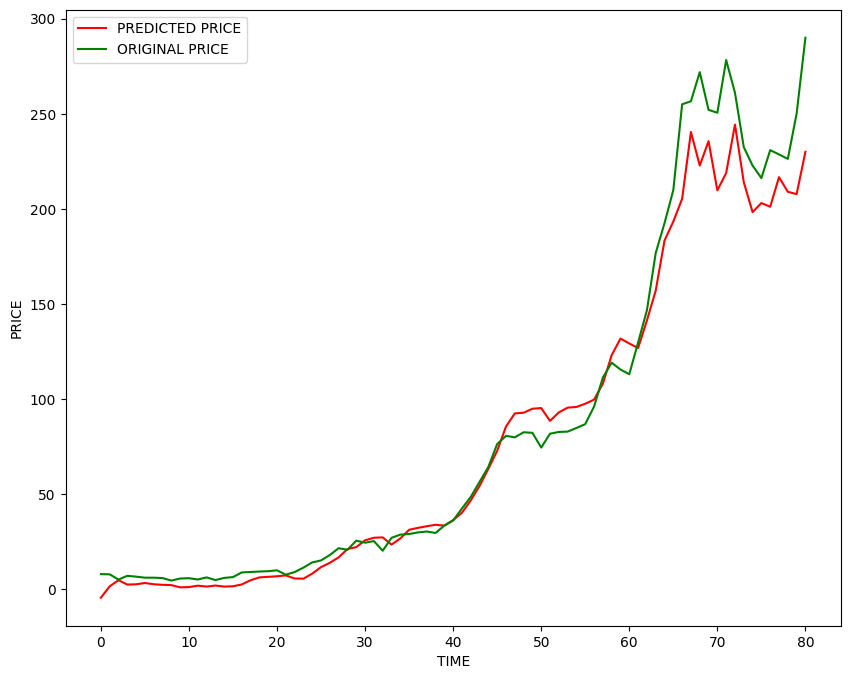

0.9664108280940108
16.573608118621358


In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='PREDICTED PRICE')
plt.plot(y,'g',label='ORIGINAL PRICE')
plt.xlabel('TIME')
plt.ylabel('PRICE')
plt.legend()
plt.show()


from sklearn.metrics import r2_score as r2s
from sklearn.metrics import mean_squared_error as mse
r2 = r2s(y, y_predict)
mean_error = mse(y, y_predict)


print(r2)
print(np.sqrt(mean_error))

In [30]:
model.save('Stock top_down1.keras')